In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [3]:
import pprint
import matplotlib.pyplot as plt

In [4]:
from hydra import initialize, compose

In [5]:
from object_detection_impl.train import _run

## config

In [6]:
def load_config():
    with initialize(version_base=None, config_path="../configs"):
        cfg = compose(config_name="config_tv_clf")
        print(cfg)
        return cfg

In [7]:
cfg = load_config()

{'general': {'logs_folder_name': 'logs', 'root_dir': '/home/ajkdrag/workspace/projects/object-detection-impl/experiments', 'workspace': 'ajkdrag', 'project_name': 'od-impl', 'device': 'cuda', 'exp_name': '${datamodule.dataset.name}'}, 'datamodule': {'path': '/home/ajkdrag/workspace/projects/object-detection-impl/data/cifar10', 'class_name': 'datamodules.tv_clf_dm.TorchvisionClfDatamodule', 'dataset': {'class_name': 'datasets.tv_clf_ds.TorchvisionClfDataset', 'name': 'CIFAR10', 'mean': [0.4914, 0.4822, 0.4465], 'std': [0.2471, 0.2435, 0.2616], 'n_classes': 10}, 'num_workers': 8, 'batch_size': '${training.bs}', 'test_batch_size': 32, 'pin_memory': True, 'splits': [0.7, 0.3]}, 'augmentation': {'train': [{'class_name': 'albumentations.RandomResizedCrop', 'params': {'height': '${model.input_size}', 'width': '${model.input_size}', 'scale': [0.75, 1], 'p': 0.5}}, {'class_name': 'albumentations.HorizontalFlip', 'params': {'p': 0.5}}, {'class_name': 'albumentations.ShiftScaleRotate', 'params': 

In [8]:
cfg.augmentation

{'train': [{'class_name': 'albumentations.RandomResizedCrop', 'params': {'height': '${model.input_size}', 'width': '${model.input_size}', 'scale': [0.75, 1], 'p': 0.5}}, {'class_name': 'albumentations.HorizontalFlip', 'params': {'p': 0.5}}, {'class_name': 'albumentations.ShiftScaleRotate', 'params': {'shift_limit': 0.1, 'scale_limit': 0.1, 'rotate_limit': 10, 'p': 0.5}}, {'class_name': 'albumentations.ColorJitter', 'params': {'brightness': 0.2, 'contrast': 0.2, 'saturation': 0.2, 'hue': 0.01, 'p': 1.0}}, {'class_name': 'albumentations.CoarseDropout', 'params': {'num_holes_range': [1, 1], 'hole_height_range': [8, 8], 'hole_width_range': [8, 8], 'fill_value': 120, 'p': 0.1}}, {'class_name': 'albumentations.Normalize', 'params': {'mean': '${datamodule.dataset.mean}', 'std': '${datamodule.dataset.std}', 'p': 1.0}}, {'class_name': 'albumentations.pytorch.transforms.ToTensorV2', 'params': {'p': 1.0}}], 'val': [{'class_name': 'albumentations.Normalize', 'params': {'mean': '${datamodule.datase

## train

In [ ]:
_run(cfg)

2024-06-18T07:08:53.858095Z [info     ] **** Running train func ****   func_name=_run lineno=18


/home/ajkdrag/workspace/projects/object-detection-impl/.venv/lib/python3.9/site-packages/lightning/fabric/connector.py:563: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/ajkdrag/workspace/projects/object-detection-impl/.venv/lib/python3.9/site-packages/pydantic/main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


Files already downloaded and verified
Files already downloaded and verified
2024-06-18T07:08:56.033632Z [info     ] train_dataset size: 35000      func_name=setup lineno=77
2024-06-18T07:08:56.040437Z [info     ] val_dataset size: 15000        func_name=setup lineno=78


/home/ajkdrag/workspace/projects/object-detection-impl/.venv/lib/python3.9/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:653: Checkpoint directory /home/ajkdrag/workspace/projects/object-detection-impl/experiments/CIFAR10/model_checkpoints exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loading `train_dataloader` to estimate number of stepping batches.


INFO: 
  | Name    | Type             | Params
---------------------------------------------
0 | model   | ConvTiny         | 80.2 K
1 | loss    | CrossEntropyLoss | 0     
2 | metrics | ModuleDict       | 0     
---------------------------------------------
80.2 K    Trainable params
0         Non-trainable params
80.2 K    Total params
0.321     Total estimated model params size (MB)


Training: |                                                                                                   …

/home/ajkdrag/workspace/projects/object-detection-impl/.venv/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

In [27]:
for idx, out in enumerate(pred_run(cfg)):
    if idx == 0:
        print(out.shape)
        break

2024-06-12T05:12:04.705571Z [info     ] **** Running predict func **** func_name=_run lineno=36
Files already downloaded and verified
Files already downloaded and verified
torch.Size([32, 3, 140, 120])


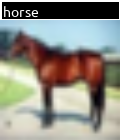

In [33]:
to_pil_image(out[9])

## exp

In [310]:
import torch
from torch import nn

In [335]:
ip = torch.randn([2, 27, 30, 30])

In [336]:
nn.Unfold(kernel_size=3, stride=1)(ip).shape

torch.Size([2, 243, 784])

In [337]:
784**0.5

28.0

In [295]:
from object_detection_impl.datamodules.tv_clf_dm import TorchvisionClfDatamodule
from object_detection_impl.callbacks.vis_dls import VisualizeDlsCallback
from object_detection_impl.utils.vis import draw_labels_on_images, gridify
from torchvision.transforms.functional import to_pil_image

Reloading 'object_detection_impl.utils.vis'.
Reloading 'object_detection_impl.callbacks.vis_dls'.


In [290]:
cb = VisualizeDlsCallback(scale=4)

In [213]:
dm = TorchvisionClfDatamodule(cfg)

Reloading 'object_detection_impl.utils.vis'.


/home/ajkdrag/workspace/projects/object-detection-impl/.venv/lib/python3.9/site-packages/pydantic/main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


In [302]:
dm.setup()

2024-06-18T08:23:50.923755Z [info     ] train_dataset size: 35000      func_name=setup lineno=80
2024-06-18T08:23:50.930772Z [info     ] val_dataset size: 15000        func_name=setup lineno=81


In [303]:
dm.prepare_data()

Files already downloaded and verified
Files already downloaded and verified


In [304]:
train_dls = dm.train_dataloader()

In [305]:
first = next(iter(train_dls))

In [306]:
viz = dm.visualize_batch(first["image"], first["target"])

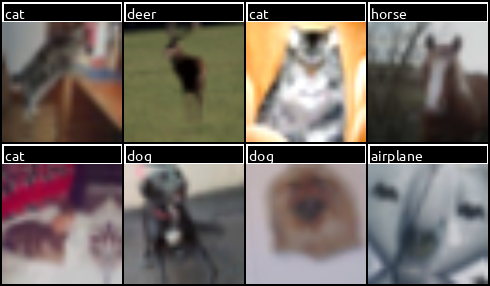

In [307]:
gridify(viz, fp=None, save=False, nrow=4)

In [308]:
viz.shape

Reloading 'object_detection_impl.datamodules.tv_clf_dm'.
Reloading 'object_detection_impl.callbacks.vis_dls'.


torch.Size([8, 3, 140, 120])